https://www.learnopencv.com/duplicate-search-on-quora-dataset/

https://www.learnopencv.com/universal-sentence-encoder/

https://github.com/tensorflow/hub/issues/94

https://www.learnopencv.com/universal-sentence-encoder/

In [1]:
csv_fname = "/home/raghav/Practice/MLPractice/Data/quora_duplicate_questions/train.csv"
 
question1 = {}
question2 = {}
 
print("Loading data from {}".format(csv_fname))
 
numLines = int(input("Enter number of lines to read: "))
 
with open(csv_fname,'r') as f:
    if numLines == -1:
        totalLines = f.readlines()[1:]
    else:
        totalLines = f.readlines()[1:numLines]
    for line in totalLines:
        try:
            qid1, qid2, q1, q2 = line.strip().split(',')[1:5]
            question1[qid1] = q1
            question2[qid2] = q2
        except:
            continue
print("Data loaded successfully")

Loading data from /home/raghav/Practice/MLPractice/Data/quora_duplicate_questions/train.csv
Enter number of lines to read: 1000
Data loaded successfully


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
 
print("Loading model from {}".format(module_url))
embed = hub.Module(module_url)
print("Model loaded successfully")

Loading model from https://tfhub.dev/google/universal-sentence-encoder/2
INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
Model loaded successfully


In [5]:
def plot_similarity(labels1, labels2, features1, features2, rotation):
    corr = np.inner(features1, features2)
    corr2 = corr.copy()
    corr2[corr2<0.8]=0
    corr2[corr2>=0.8]=1
    sns.set(font_scale=0.6)
    g = sns.heatmap(corr,\
        vmin=0,\
        vmax=1,\
        cmap="YlOrRd")
    g.set_title("Semantic Textual Similarity")
    plt.tight_layout()
    plt.savefig("Quora.png")
    plt.show()
    similar_qid = {}
    for i in range(len(labels1)):
        for j in range(len(labels2)):
            if corr2[i][j] == 1:
                similar_qid[labels1[i]]=labels2[j]
    return similar_qid

def run_and_plot(session_, input_tensor_, messages1_, messages2_, labels1_,labels2_, encoding_tensor):
    print("Embeddings questions 1")
    message_embeddings1_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages1_})
    print("Embeddings questions 2")
    message_embeddings2_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages2_})
    similar_qid = plot_similarity(labels1_,labels2_, \
            message_embeddings1_,\
            message_embeddings2_, 90)
    return similar_qid

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Embeddings questions 1
Embeddings questions 2


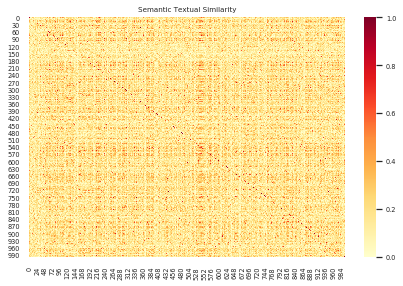

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    similar_qid = run_and_plot(session, similarity_input_placeholder,\
            list(question1.values()),\
            list(question2.values()),\
            list(question1.keys()),\
            list(question2.keys()),\
            similarity_message_encodings)

with open("similarity-results.txt",'w') as f:
    for i in list(similar_qid.keys()):
        f.write("{},{}\n=======================\n".format(question1[i], question2[similar_qid[i]]))